### Imagenes de los famosos


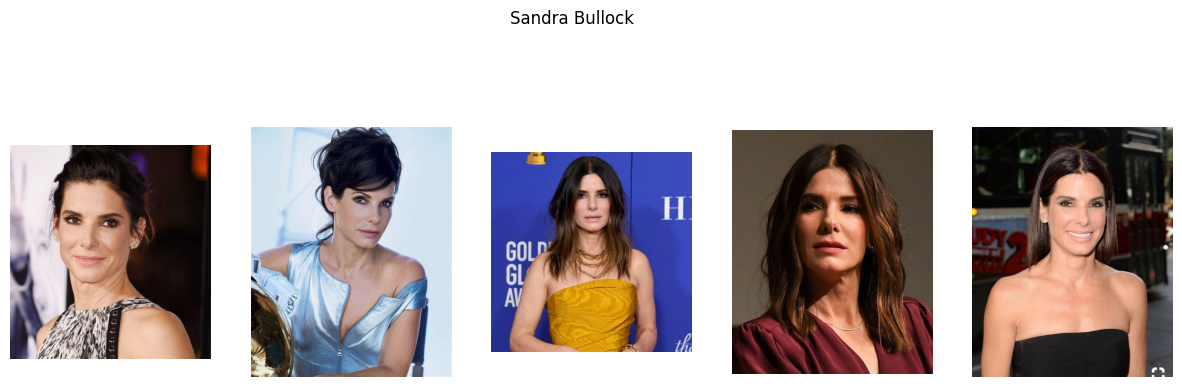

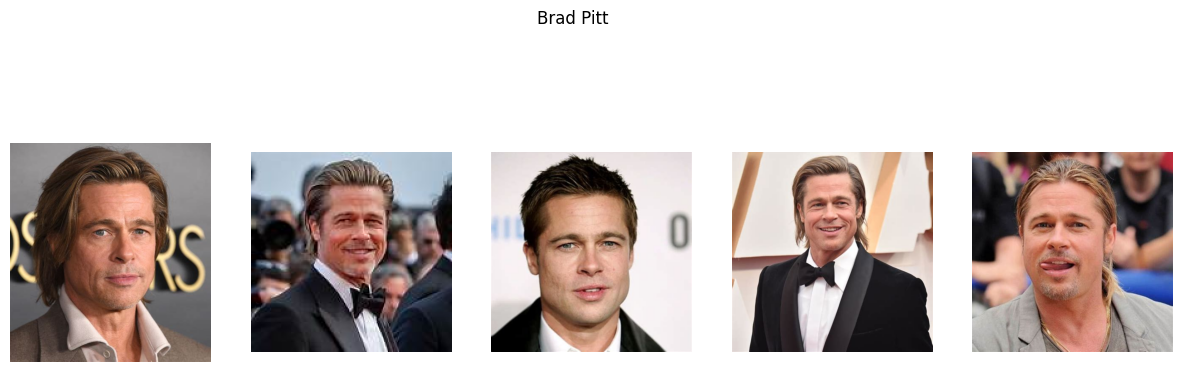

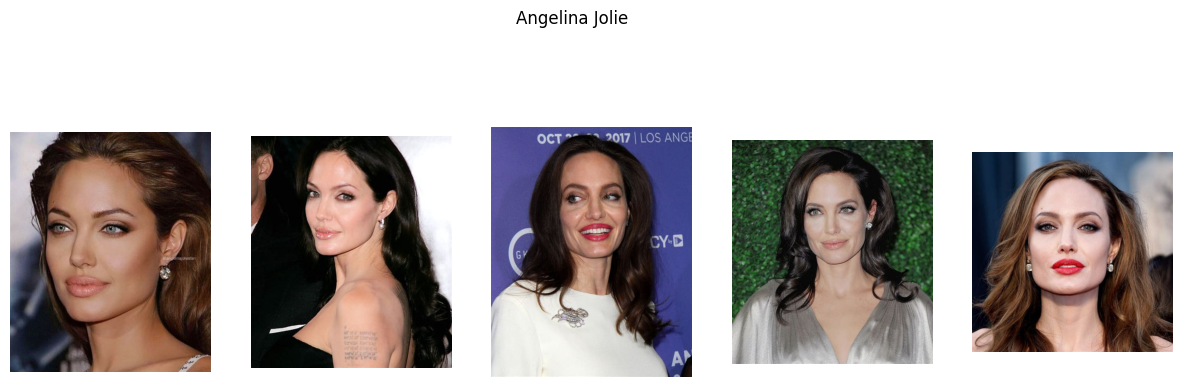

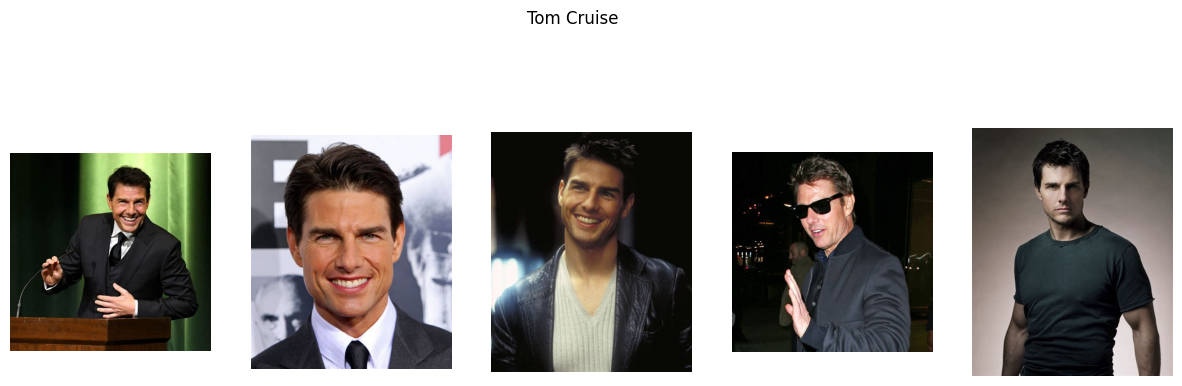

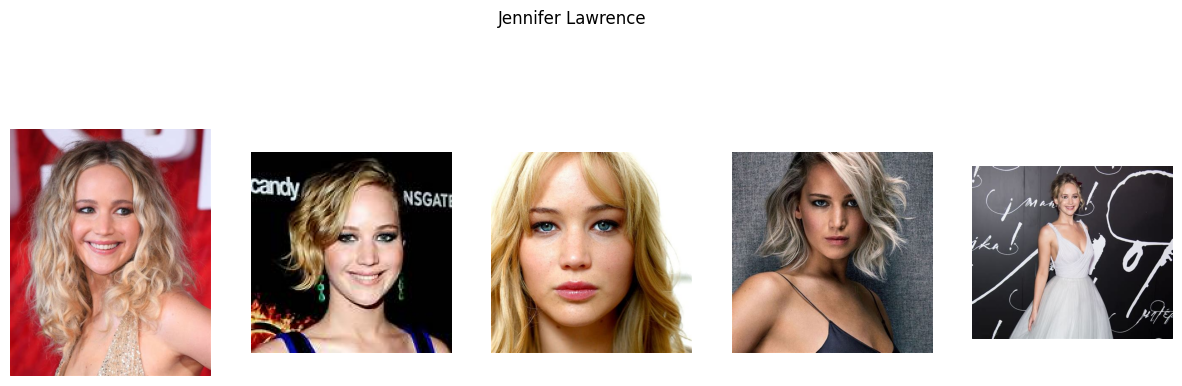

In [2]:
import random
import os
import cv2
import matplotlib.pyplot as plt

def show_samples(dataset_path, n_samples=5):
    classes = os.listdir(dataset_path)
    for cls in random.sample(classes, min(len(classes), n_samples)):
        cls_path = os.path.join(dataset_path, cls)
        images = os.listdir(cls_path)
        fig, axs = plt.subplots(1, min(5, len(images)), figsize=(15, 5))
        fig.suptitle(cls)
        for i, ax in enumerate(axs):
            img_path = os.path.join(cls_path, random.choice(images))
            images.remove(os.path.basename(img_path))  # Remove the selected image from the list
            img = cv2.imread(img_path)[..., ::-1]
            ax.imshow(img)
            ax.axis('off')
        plt.show()

show_samples("../Celebrity Faces Dataset")


### Numero de imagenes de los famosos

In [3]:
import os
from collections import defaultdict

def contar_imagenes_por_clase(directorio):
    conteo_clases = defaultdict(int)
    for root, dirs, files in os.walk(directorio):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                clase = os.path.basename(root)
                conteo_clases[clase] += 1
    return conteo_clases


Numero de famosos y sus fotos

In [4]:
import os

dataset_path = "../Celebrity Faces Dataset"
classes = os.listdir(dataset_path)
print(f"Número de clases: {len(classes)}")
for cls in classes:
    print(f"{cls}: {len(os.listdir(os.path.join(dataset_path, cls)))} imágenes")


Número de clases: 17
Angelina Jolie: 100 imágenes
Natalie Portman: 100 imágenes
Brad Pitt: 100 imágenes
Nicole Kidman: 100 imágenes
Jennifer Lawrence: 100 imágenes
Denzel Washington: 100 imágenes
Sandra Bullock: 100 imágenes
Hugh Jackman: 100 imágenes
Tom Cruise: 100 imágenes
Johnny Depp: 100 imágenes
Leonardo DiCaprio: 100 imágenes
Will Smith: 100 imágenes
Scarlett Johansson: 200 imágenes
Robert Downey Jr: 100 imágenes
Kate Winslet: 100 imágenes
Megan Fox: 100 imágenes
Tom Hanks: 100 imágenes


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conteo_imagenes(conteo, titulo):
    clases = list(conteo.keys())
    conteos = list(conteo.values())
    colors = sns.color_palette('viridis', len(clases))  # Convertir la paleta a una lista

    plt.figure(figsize=(12, 6))
    sns.barplot(x=clases, y=conteos, palette=colors, hue=clases, dodge=False)
    plt.xlabel('Clases')
    plt.ylabel('Número de Imágenes')
    plt.title(titulo)
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x a 90 grados (vertical)
    plt.legend([],[], frameon=False)  # Ocultar la leyenda
    plt.show()


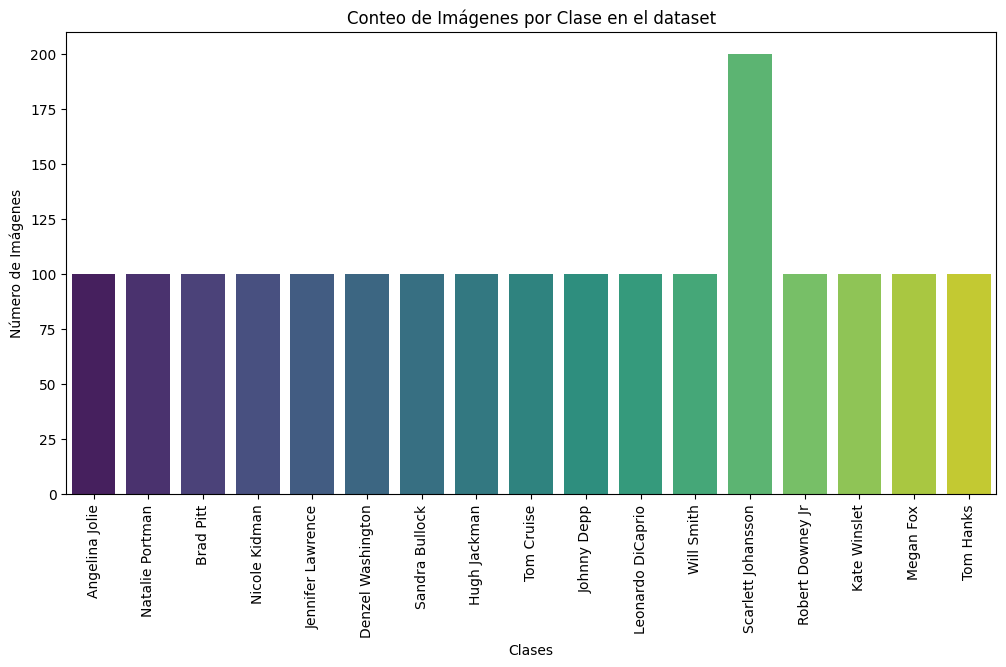

In [9]:

data_dir = "../Celebrity Faces Dataset"

conteo_dataset = contar_imagenes_por_clase(data_dir)

plot_conteo_imagenes(conteo_dataset, "Conteo de Imágenes por Clase en el dataset")

### Comprobación de imagenes repetidas

In [10]:
import hashlib
from collections import defaultdict

def calcular_hash_imagen(image_path):
    """Calcula el hash MD5 de una imagen."""
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

def encontrar_imagenes_duplicadas(directorio):
    """
    Encuentra imágenes duplicadas en un directorio dado.
    Esta función recorre recursivamente un directorio y calcula el hash de cada imagen
    (archivos con extensiones .jpg, .jpeg, .png). Luego, agrupa las imágenes por su hash
    y devuelve un diccionario con los hashes como claves y listas de rutas de archivos
    como valores, donde cada lista contiene las rutas de las imágenes duplicadas.
    Args:
        directorio (str): La ruta del directorio en el que buscar imágenes duplicadas.
    Returns:
        dict: Un diccionario donde las claves son los hashes de las imágenes y los valores
              son listas de rutas de archivos que corresponden a imágenes duplicadas.
    """
    hashes = defaultdict(list)
    for root, dirs, files in os.walk(directorio):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file)
                file_hash = calcular_hash_imagen(file_path)
                hashes[file_hash].append(file_path)
    
    duplicados = {hash: paths for hash, paths in hashes.items() if len(paths) > 1}
    return duplicados

Número de imágenes duplicadas: 89


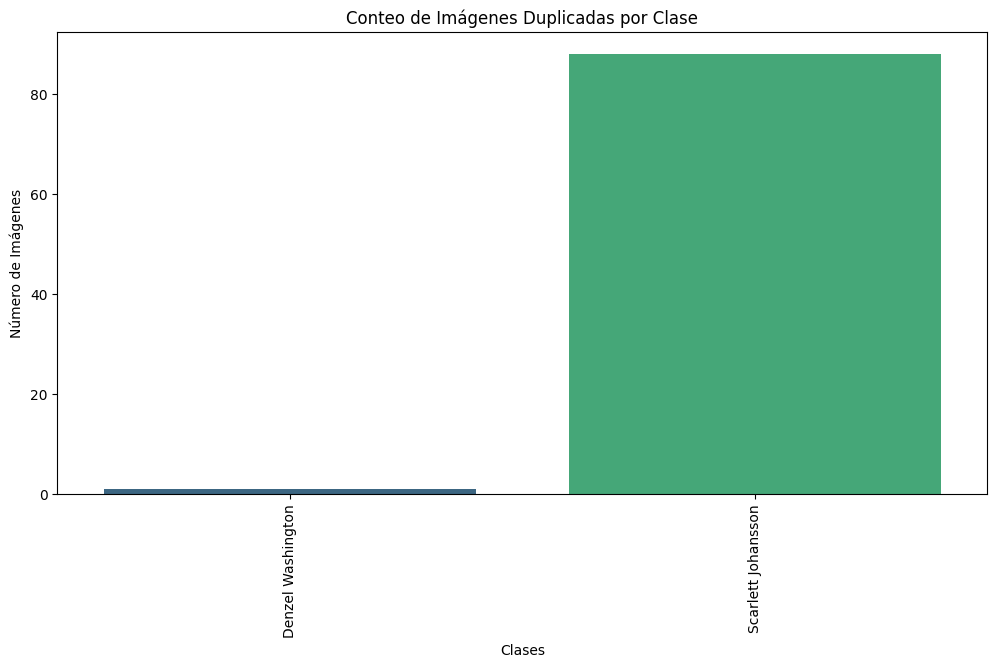

In [11]:
# Directorios
dataset_dir = "../Celebrity Faces Dataset"

# Encontrar imágenes duplicadas en cada directorio
duplicados = encontrar_imagenes_duplicadas(dataset_dir)

# Numero de imagenes duplicadas
num_duplicados = sum(len(paths) - 1 for paths in duplicados.values())

print(f"Número de imágenes duplicadas: {num_duplicados}")

# Contar imágenes duplicadas por clase
conteo_duplicados = defaultdict(int)
for paths in duplicados.values():
    clase = os.path.basename(os.path.dirname(paths[0]))
    conteo_duplicados[clase] += len(paths) - 1

# Graficar el conteo de imágenes duplicadas por clase
plot_conteo_imagenes(conteo_duplicados, "Conteo de Imágenes Duplicadas por Clase")

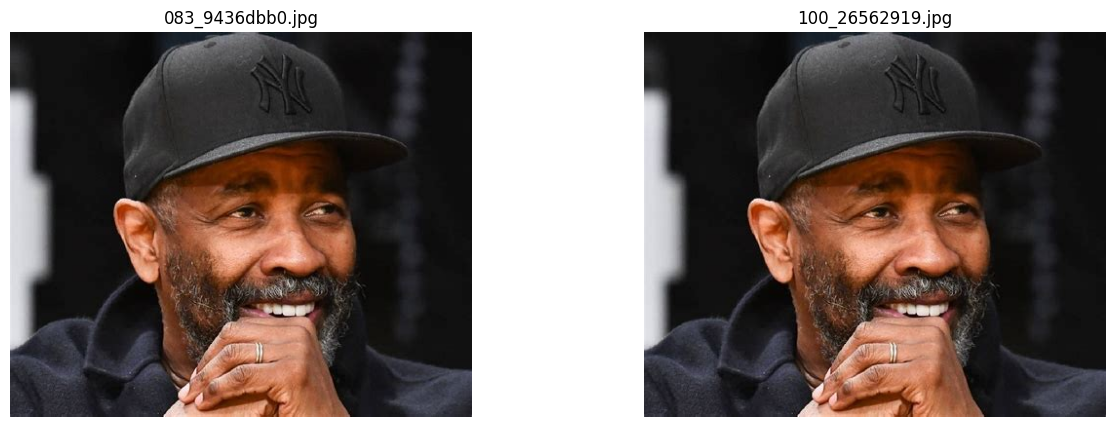

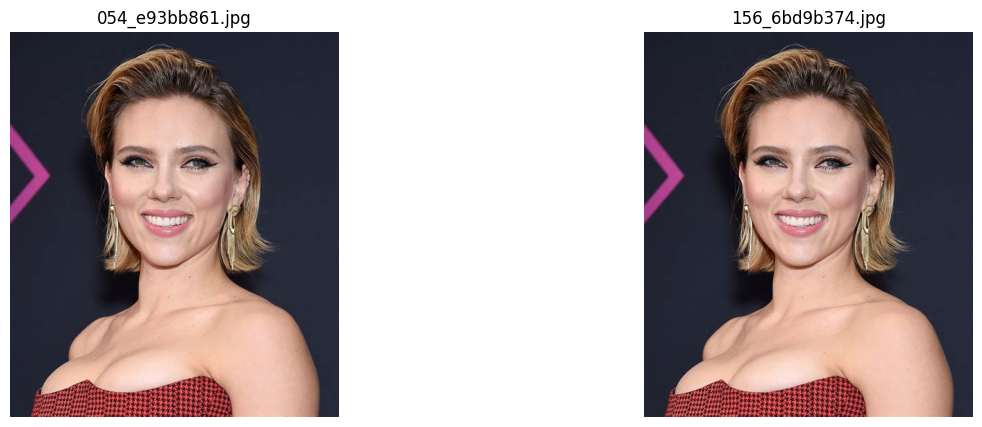

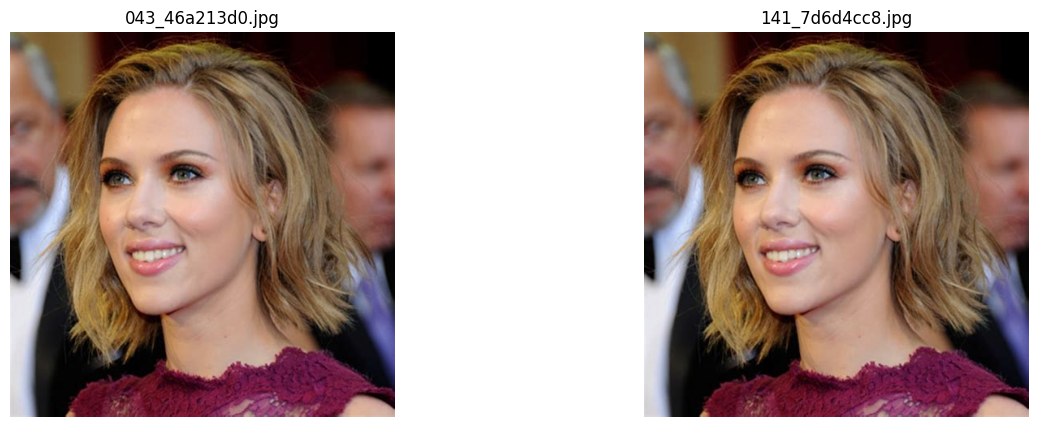

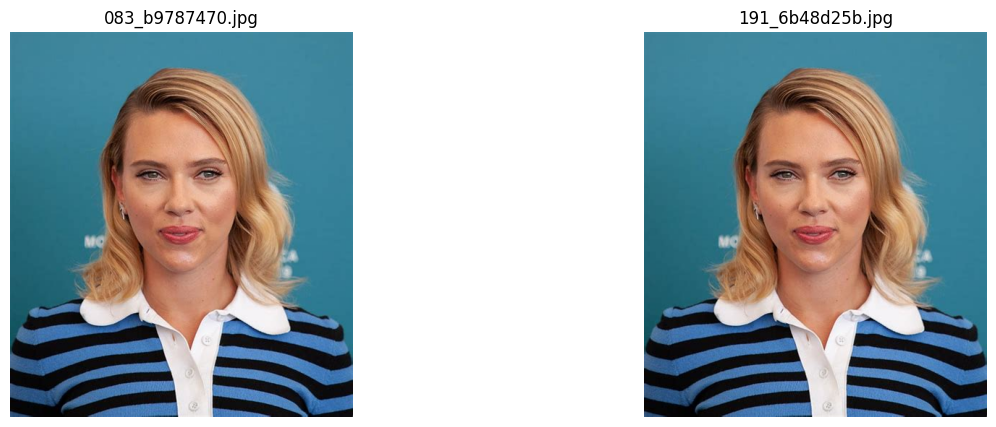

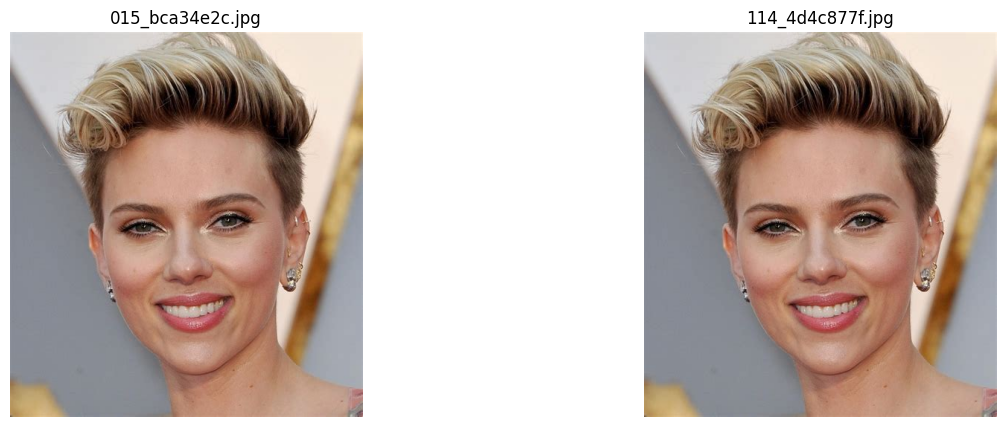

In [12]:
# Mostrar algunas imágenes duplicadas

def mostrar_imagenes_duplicadas(duplicados, n_muestras=5):
    for paths in list(duplicados.values())[:n_muestras]:
        fig, axs = plt.subplots(1, len(paths), figsize=(15, 5))
        for ax, img_path in zip(axs, paths):
            img = cv2.imread(img_path)[..., ::-1]
            ax.imshow(img)
            ax.set_title(os.path.basename(img_path))
            ax.axis('off')
        plt.show()

mostrar_imagenes_duplicadas(duplicados)

### Dimensiones de las images

In [13]:
import numpy as np

def calcular_estadisticas_dimensiones(directorio):
    anchos = []
    altos = []
    
    for root, dirs, files in os.walk(directorio):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file)
                img = cv2.imread(file_path)
                if img is not None:
                    alto, ancho, _ = img.shape
                    anchos.append(ancho)
                    altos.append(alto)
    
    if not anchos or not altos:
        return {
            'ancho': {'max': 0, 'min': 0, 'media': 0, 'std': 0},
            'alto': {'max': 0, 'min': 0, 'media': 0, 'std': 0}
        }
    
    estadisticas = {
        'ancho': {
            'max': np.max(anchos),
            'min': np.min(anchos),
            'media': np.mean(anchos),
            'std': np.std(anchos)
        },
        'alto': {
            'max': np.max(altos),
            'min': np.min(altos),
            'media': np.mean(altos),
            'std': np.std(altos)
        }
    }
    
    return estadisticas

# Calcular las estadísticas de las dimensiones de las imágenes en el dataset
estadisticas_dimensiones = calcular_estadisticas_dimensiones(dataset_dir)
print(f"Estadísticas de las ancho:\n{estadisticas_dimensiones.get('ancho')}")
print(f"Estadísticas de las alto:\n{estadisticas_dimensiones.get('alto')}")

Estadísticas de las ancho:
{'max': np.int64(474), 'min': np.int64(160), 'media': np.float64(455.0988888888889), 'std': np.float64(73.18476768418174)}
Estadísticas de las alto:
{'max': np.int64(592), 'min': np.int64(135), 'media': np.float64(496.4161111111111), 'std': np.float64(97.4008365603413)}


In [15]:
def calcular_estadisticas_por_clase(directorio):
    estadisticas_por_clase = {}
    
    for clase in os.listdir(directorio):
        anchos = []
        altos = []
        clase_path = os.path.join(directorio, clase)
        
        for file in os.listdir(clase_path):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(clase_path, file)
                img = cv2.imread(file_path)
                if img is not None:
                    alto, ancho, _ = img.shape
                    anchos.append(ancho)
                    altos.append(alto)
        
        if anchos and altos:
            estadisticas_por_clase[clase] = {
                'ancho': {
                    'max': np.max(anchos),
                    'min': np.min(anchos),
                    'media': np.mean(anchos),
                    'std': np.std(anchos)
                },
                'alto': {
                    'max': np.max(altos),
                    'min': np.min(altos),
                    'media': np.mean(altos),
                    'std': np.std(altos)
                }
            }
    
    return estadisticas_por_clase

# Calcular las estadísticas por clase en el dataset
estadisticas_por_clase = calcular_estadisticas_por_clase(dataset_dir)

# Mostrar las estadísticas por clase
for clase, stats in estadisticas_por_clase.items():
    print(f"Clase: {clase}")
    print(f"  Ancho - Max: {stats['ancho']['max']}, Min: {stats['ancho']['min']}, Media: {stats['ancho']['media']:.2f}, Std: {stats['ancho']['std']:.2f}")
    print(f"  Alto  - Max: {stats['alto']['max']}, Min: {stats['alto']['min']}, Media: {stats['alto']['media']:.2f}, Std: {stats['alto']['std']:.2f}")

Clase: Angelina Jolie
  Ancho - Max: 474, Min: 160, Media: 445.74, Std: 89.86
  Alto  - Max: 592, Min: 150, Media: 509.27, Std: 113.70
Clase: Natalie Portman
  Ancho - Max: 474, Min: 160, Media: 458.30, Std: 68.43
  Alto  - Max: 592, Min: 135, Media: 518.63, Std: 94.12
Clase: Brad Pitt
  Ancho - Max: 474, Min: 160, Media: 430.82, Std: 104.77
  Alto  - Max: 592, Min: 159, Media: 459.49, Std: 122.67
Clase: Nicole Kidman
  Ancho - Max: 474, Min: 160, Media: 452.02, Std: 80.12
  Alto  - Max: 592, Min: 160, Media: 504.70, Std: 103.45
Clase: Jennifer Lawrence
  Ancho - Max: 474, Min: 160, Media: 464.58, Std: 53.56
  Alto  - Max: 592, Min: 160, Media: 516.43, Std: 80.39
Clase: Denzel Washington
  Ancho - Max: 474, Min: 160, Media: 465.82, Std: 37.84
  Alto  - Max: 592, Min: 193, Media: 490.95, Std: 63.98
Clase: Sandra Bullock
  Ancho - Max: 474, Min: 160, Media: 448.63, Std: 85.15
  Alto  - Max: 592, Min: 159, Media: 501.91, Std: 109.33
Clase: Hugh Jackman
  Ancho - Max: 474, Min: 160, Media:

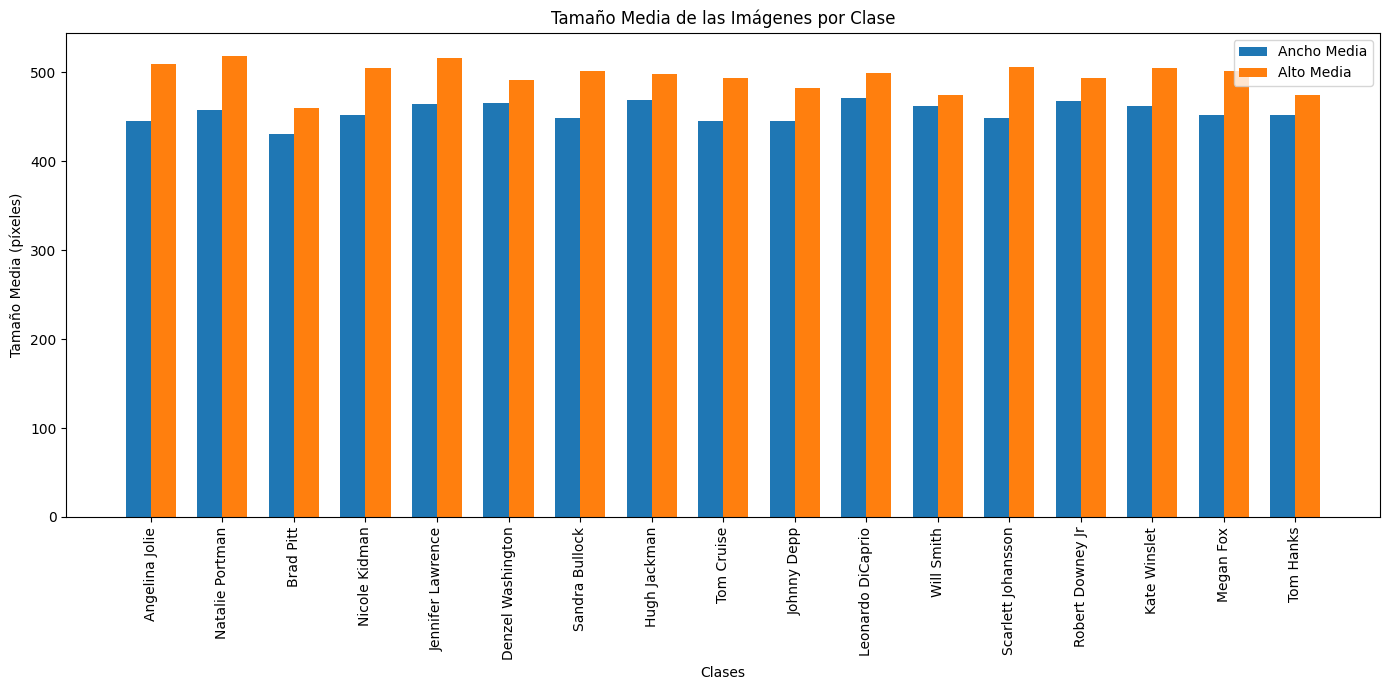

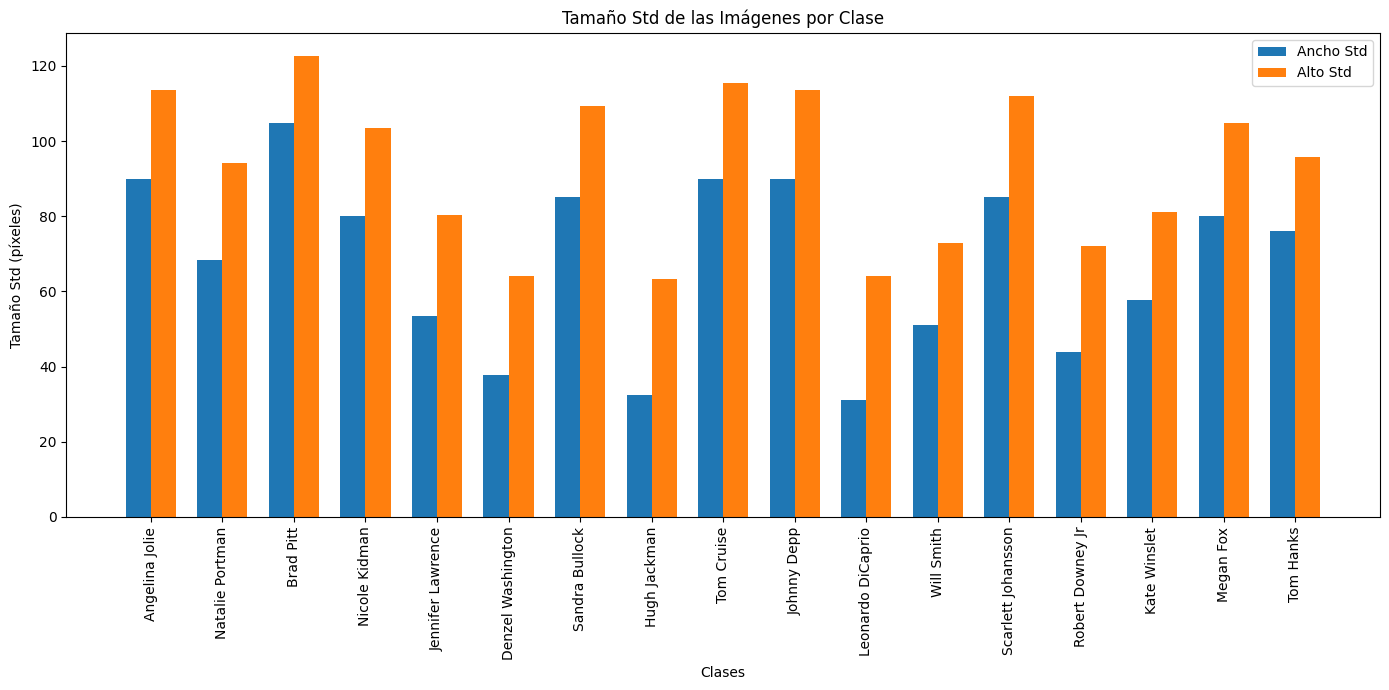

In [16]:
def plot_estadistica_por_clase(estadisticas_por_clase, estadistica='media'):
    clases = list(estadisticas_por_clase.keys())
    anchos = [estadisticas_por_clase[clase]['ancho'][estadistica] for clase in clases]
    altos = [estadisticas_por_clase[clase]['alto'][estadistica] for clase in clases]

    plt.figure(figsize=(14, 7))
    bar_width = 0.35
    index = np.arange(len(clases))

    bar1 = plt.bar(index, anchos, bar_width, label=f'Ancho {estadistica.capitalize()}')
    bar2 = plt.bar(index + bar_width, altos, bar_width, label=f'Alto {estadistica.capitalize()}')

    plt.xlabel('Clases')
    plt.ylabel(f'Tamaño {estadistica.capitalize()} (píxeles)')
    plt.title(f'Tamaño {estadistica.capitalize()} de las Imágenes por Clase')
    plt.xticks(index + bar_width / 2, clases, rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
plot_estadistica_por_clase(estadisticas_por_clase, 'media')
plot_estadistica_por_clase(estadisticas_por_clase, 'std')


### Distribución de aspect ratio

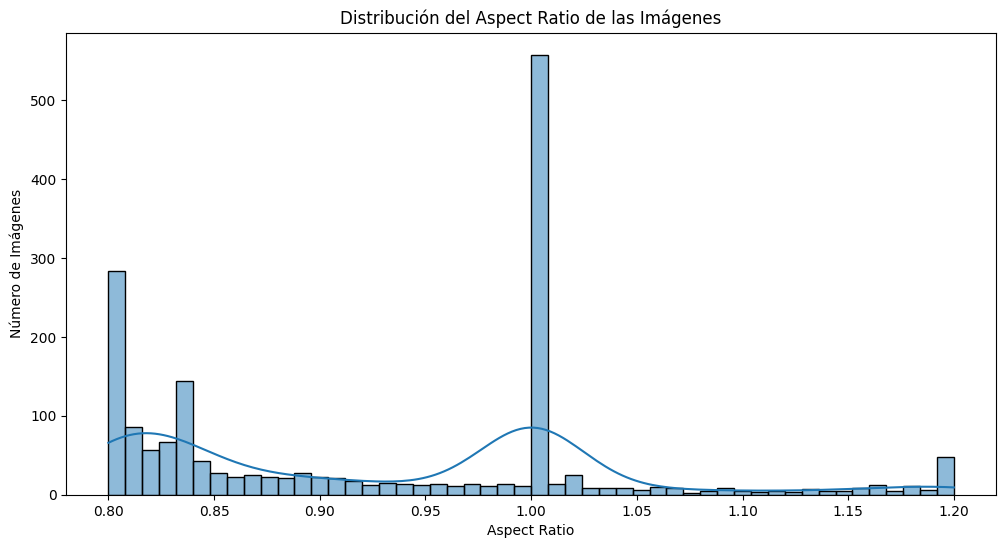

In [17]:
# Distribución general del aspect ratio

def plot_aspect_ratio_distribution(directorio):
    aspect_ratios = []
    
    for root, dirs, files in os.walk(directorio):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file)
                img = cv2.imread(file_path)
                if img is not None:
                    alto, ancho, _ = img.shape
                    aspect_ratio = ancho / alto
                    aspect_ratios.append(aspect_ratio)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(aspect_ratios, bins=50, kde=True)
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Número de Imágenes')
    plt.title('Distribución del Aspect Ratio de las Imágenes')
    plt.show()

plot_aspect_ratio_distribution(dataset_dir)

In [18]:
def calcular_aspect_ratios_clases(directorio):
    aspect_ratios_por_clase = {}
    
    for clase in os.listdir(directorio):
        aspect_ratios = []
        clase_path = os.path.join(directorio, clase)
        
        for file in os.listdir(clase_path):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(clase_path, file)
                img = cv2.imread(file_path)
                if img is not None:
                    alto, ancho, _ = img.shape
                    aspect_ratio = ancho / alto
                    aspect_ratios.append(aspect_ratio)
        
        aspect_ratios_por_clase[clase] = aspect_ratios
    
    return aspect_ratios_por_clase

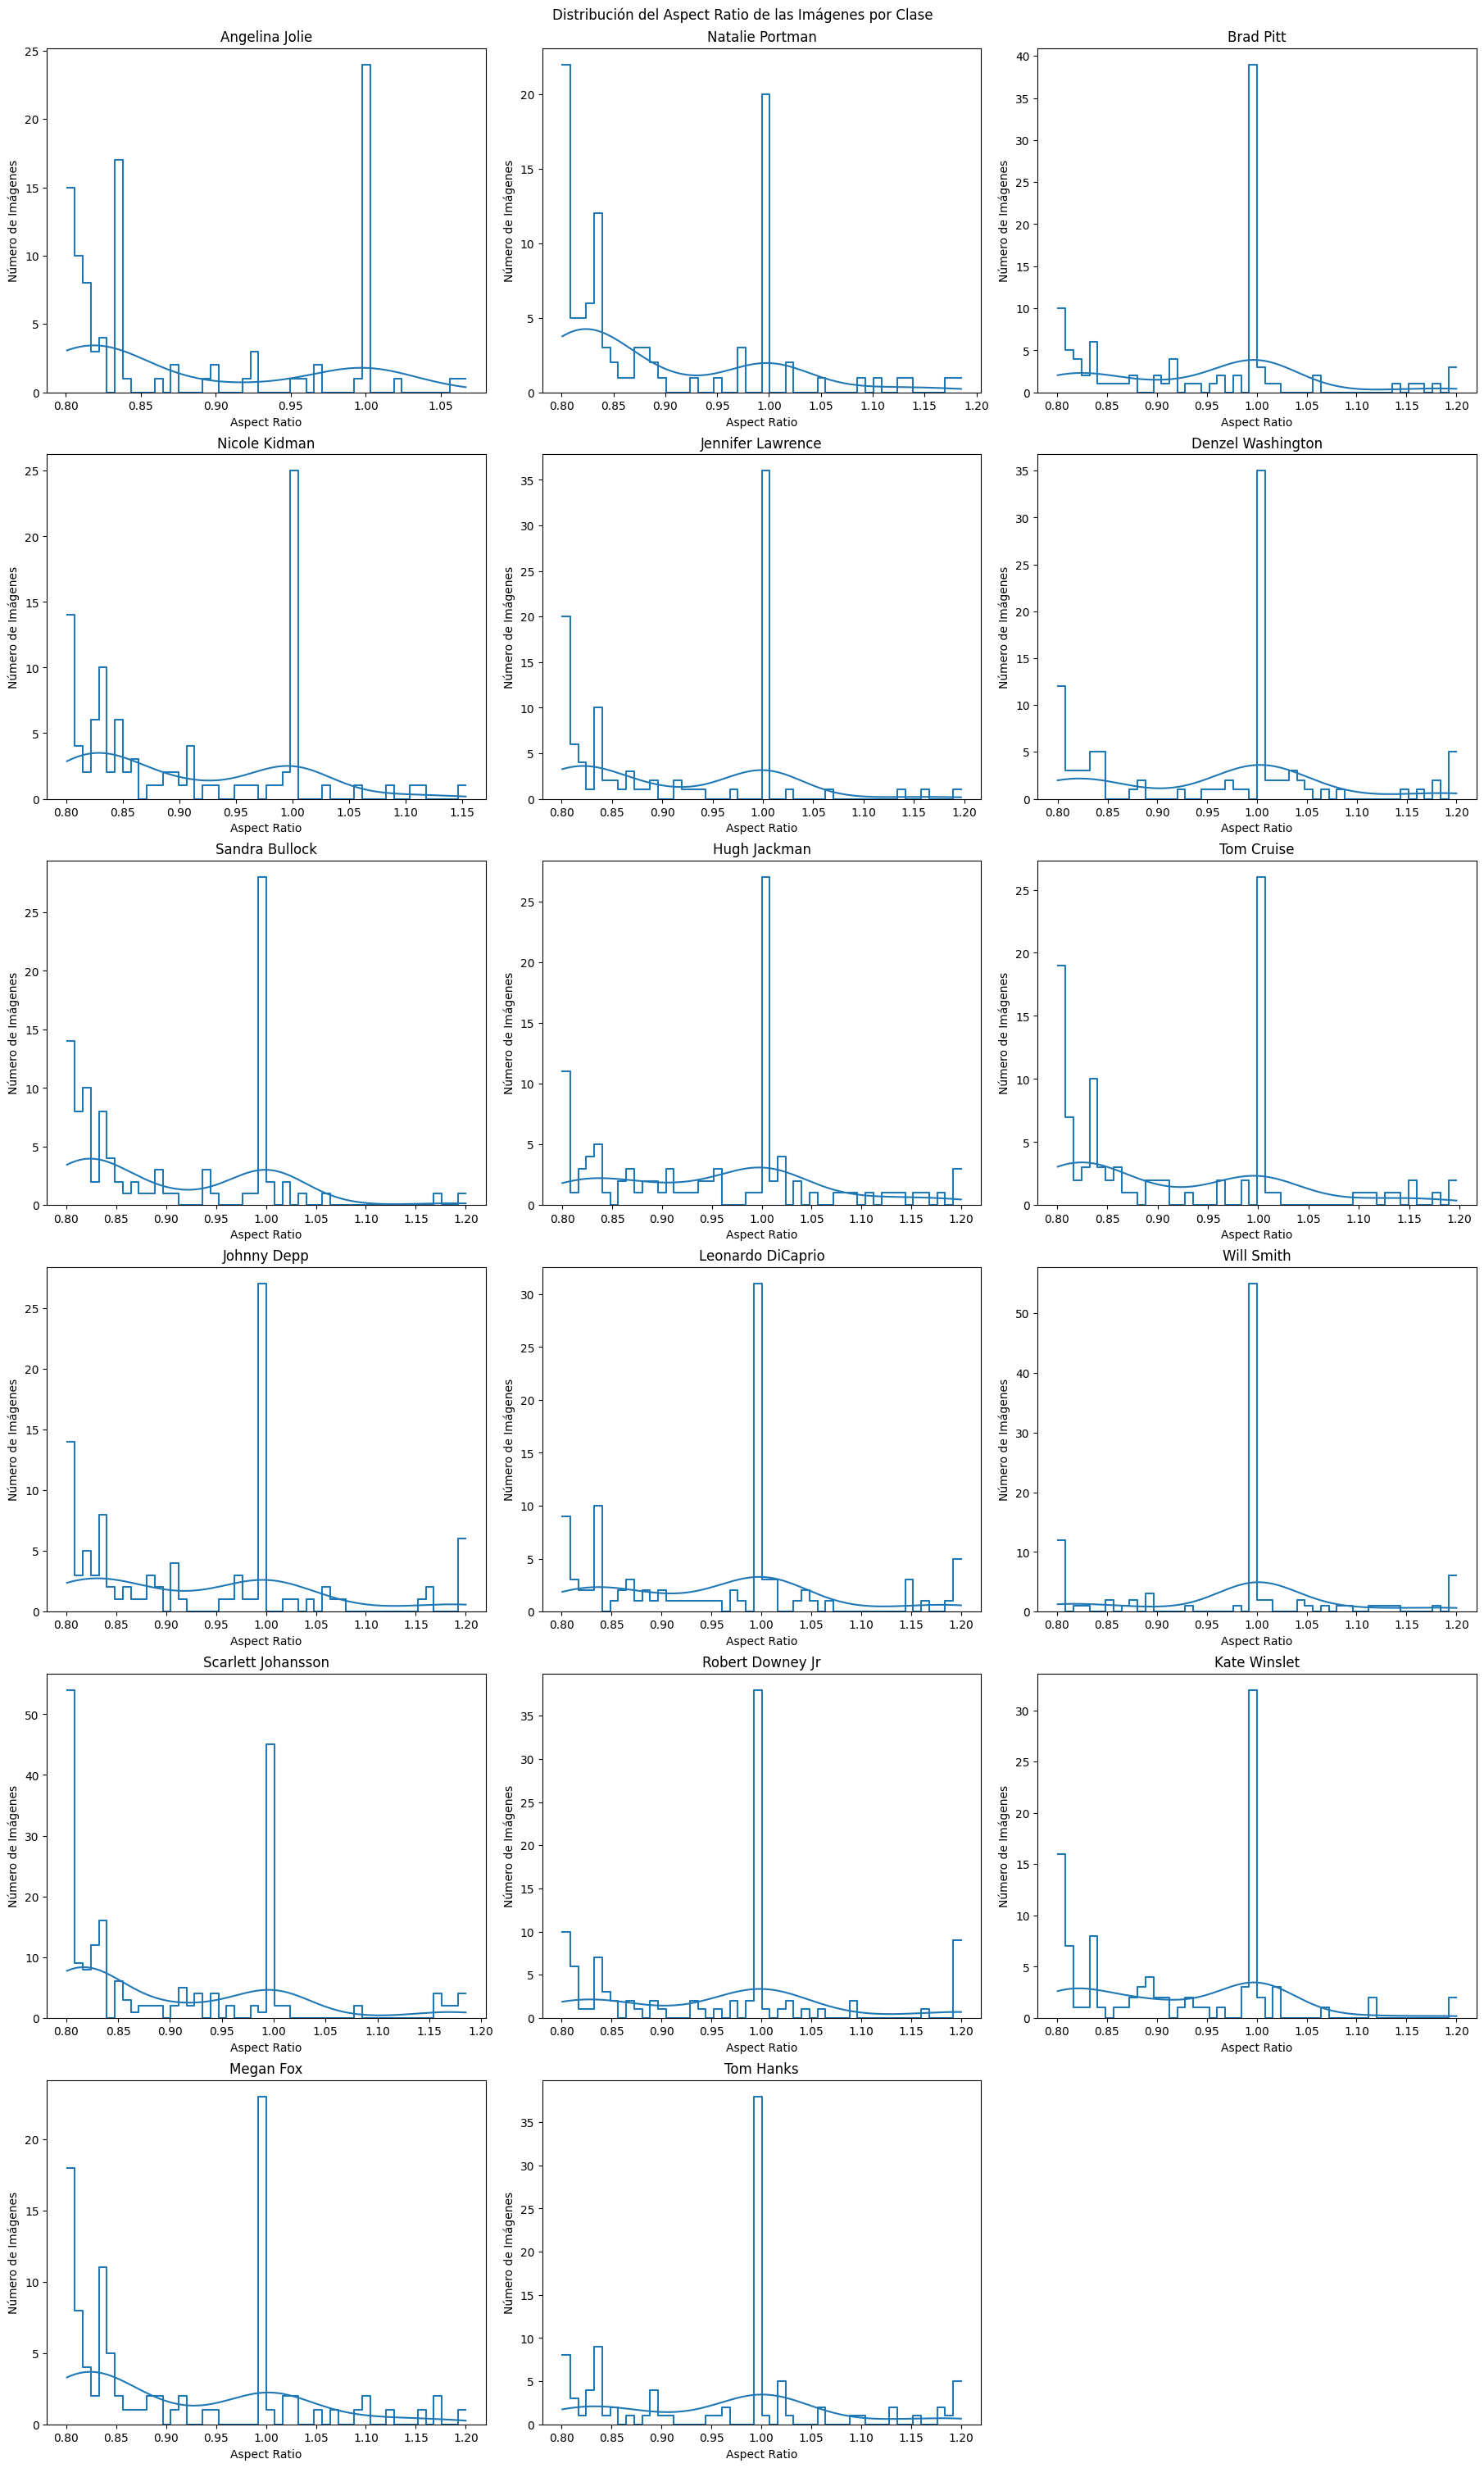

In [20]:
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

def plot_aspect_ratio_distribution_por_clase(directorio):
    aspect_ratios_por_clase = {}
    
    aspect_ratios_por_clase = calcular_aspect_ratios_clases(directorio)
    
    num_clases = len(aspect_ratios_por_clase)
    num_cols = 3
    num_rows = (num_clases + num_cols - 1) // num_cols  # Calcular el número de filas necesarias
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), constrained_layout=True)
    axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración
    
    for ax, (clase, aspect_ratios) in zip(axs, aspect_ratios_por_clase.items()):
        sns.histplot(aspect_ratios, bins=50, kde=True, ax=ax, element="step", fill=False)
        ax.set_title(clase)
        ax.set_xlabel('Aspect Ratio')
        ax.set_ylabel('Número de Imágenes')
    
    # Eliminar los ejes vacíos
    for i in range(num_clases, len(axs)):
        fig.delaxes(axs[i])
    
    plt.suptitle('Distribución del Aspect Ratio de las Imágenes por Clase')
    plt.show()

# Directorio del dataset
dataset_dir = "../Celebrity Faces Dataset"

plot_aspect_ratio_distribution_por_clase(dataset_dir)

In [21]:
def calcular_desviacion_estandar(aspect_ratios_por_clase):
    desviacion_estandar_por_clase = {}
    
    for clase, aspect_ratios in aspect_ratios_por_clase.items():
        desviacion_estandar_por_clase[clase] = np.std(aspect_ratios)
    
    return desviacion_estandar_por_clase

def plot_desviacion_estandar(desviacion_estandar_por_clase, titulo):
    clases = list(desviacion_estandar_por_clase.keys())
    desviaciones = list(desviacion_estandar_por_clase.values())
    colors = sns.color_palette('viridis', len(clases))

    plt.figure(figsize=(12, 6))
    sns.barplot(x=clases, y=desviaciones, palette=colors, hue=clases, dodge=False, legend=False)
    plt.xlabel('Clases')
    plt.ylabel('Desviación Estándar del Aspect Ratio')
    plt.title(titulo)
    plt.xticks(rotation=90)
    plt.show()

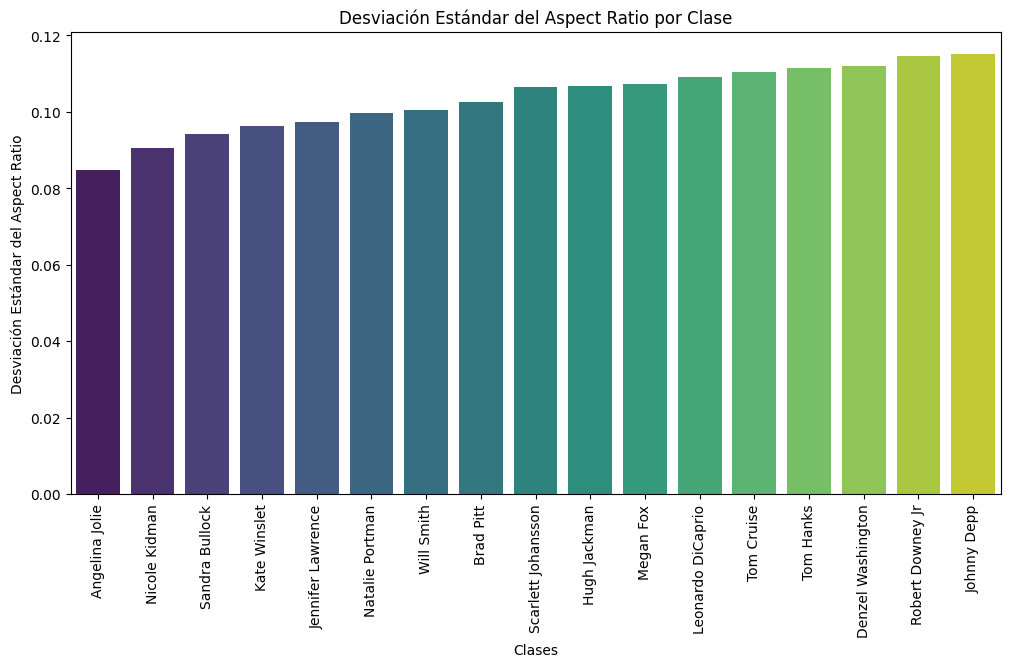

In [24]:
# Directorio del dataset
dataset_dir = "../Celebrity Faces Dataset"

# Calcular aspect ratios por clase
aspect_ratios_por_clase = calcular_aspect_ratios_clases(dataset_dir)

# Calcular desviación estándar del aspect ratio por clase
desviacion_estandar_por_clase = calcular_desviacion_estandar(aspect_ratios_por_clase)

# Ordenamos las clases por desviación estándar
desviacion_estandar_por_clase = {k: v for k, v in sorted(desviacion_estandar_por_clase.items(), key=lambda item: item[1])}

# Graficar la desviación estándar del aspect ratio por clase
plot_desviacion_estandar(desviacion_estandar_por_clase, "Desviación Estándar del Aspect Ratio por Clase")